<a href="https://colab.research.google.com/github/Aravindkumar-Rajendran/EVA/blob/master/Assignment_9%20(Second%20submission).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 5s 0us/step


<class 'numpy.ndarray'>


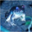

In [3]:
print(type(train_features[0]))

from google.colab.patches import cv2_imshow
cv2_imshow(train_features[0])

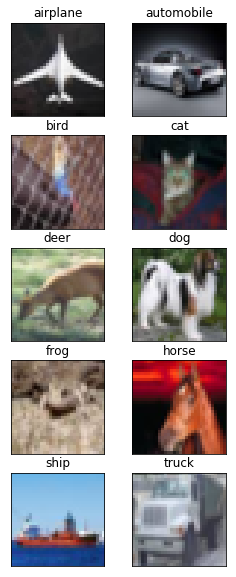

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(4,10))
for i in range(num_classes):
    ax = fig.add_subplot(5, 2, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [7]:
num_classes = 10

from keras.layers import GlobalAveragePooling2D, Convolution2D, Dropout, Activation, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras import regularizers

# Define the model
modl = Sequential()

modl.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.01), input_shape=(32, 32, 3)))#3
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())
         
modl.add(Convolution2D(64, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.01)))#5
modl.add(Activation('relu'))        
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(128, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.01)))#7
modl.add(Activation('relu'))        
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(32, 1, 1, kernel_regularizer=regularizers.l2(0.01)))
modl.add(MaxPooling2D(pool_size=(2, 2)))#14
modl.add(BatchNormalization())


modl.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.01)))#16
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(128, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.01)))#18
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(256, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.01)))#20
modl.add(Activation('relu'))        
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(32, 1, 1, border_mode='same',kernel_regularizer=regularizers.l2(0.01)))
modl.add(MaxPooling2D(pool_size=(2, 2)))#40
modl.add(BatchNormalization())

modl.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.01)))#42
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.01)))#44
modl.add(Activation('relu'))
modl.add(Dropout(0.25))
modl.add(BatchNormalization())

modl.add(Convolution2D(256, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(0.01)))#46
modl.add(Activation('relu'))        
modl.add(Dropout(0.25))

modl.add(Convolution2D(10, 1, 1))
modl.add(GlobalAveragePooling2D())
modl.add(Activation('softmax'))

W0808 13:59:50.405494 139749849257856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  # Remove the CWD from sys.path while we load stuff.
W0808 13:59:50.445447 139749849257856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 13:59:50.453577 139749849257856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 13

In [8]:
modl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
__________

In [0]:
X_train = train_features.astype('float32')/255
X_test = test_features.astype('float32')/255
#convert class labels to binary class labels
Y_train = np_utils.to_categorical(train_labels, num_classes)
Y_test = np_utils.to_categorical(test_labels, num_classes)

W0808 13:59:55.197080 139749849257856 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=80)`
  
W0808 13:59:55.579835 139749849257856 deprecation.py:323

Epoch 1/80
390/390 [==============================] - 39s 101ms/step - loss: 3.2534 - acc: 0.4668 - val_loss: 2.7309 - val_acc: 0.3189
Epoch 2/80
390/390 [==============================] - 34s 87ms/step - loss: 1.6150 - acc: 0.5864 - val_loss: 1.8442 - val_acc: 0.4848
Epoch 3/80
390/390 [==============================] - 34s 86ms/step - loss: 1.5007 - acc: 0.6257 - val_loss: 1.5780 - val_acc: 0.6000
Epoch 4/80
390/390 [==============================] - 34s 86ms/step - loss: 1.4763 - acc: 0.6469 - val_loss: 2.0873 - val_acc: 0.4989
Epoch 5/80
390/390 [==============================] - 34s 86ms/step - loss: 1.4624 - acc: 0.6594 - val_loss: 1.8250 - val_acc: 0.5533
Epoch 6/80
390/390 [==============================] - 34s 86ms/step - loss: 1.4453 - acc: 0.6722 - val_loss: 1.6625 - val_acc: 0.5900
Epoch 7/80
390/390 [==============================] - 34s 87ms/step - loss: 1.4292 - acc: 0.6781 - val_loss: 2.1359 - val_acc: 0.4568
Epoch 8/80
390/390 [==============================] - 34s 87m

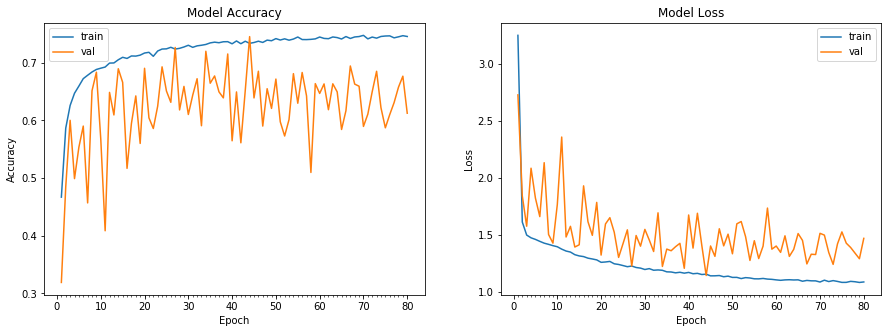

Accuracy on test data is: 61.23


In [10]:
# Compile the model
modl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

import time

start = time.time()  
#Train the model
modl_info = modl.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = X_train.shape[0], nb_epoch = 80, 
                                 validation_data = (X_test, Y_test), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(modl_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, modl))

In [0]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [0]:
# from keras.models import load_model

# model = load_model("/content/drive/My Drive/Assignment9.h5")


model = modl

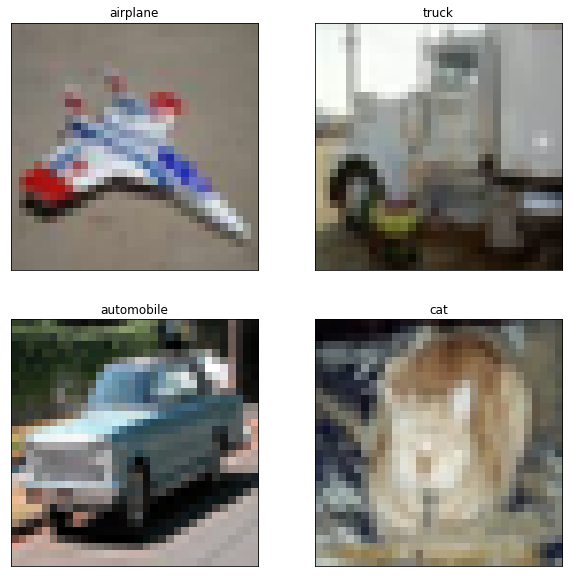

In [17]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

s = 30
ig = train_features[s:s+5]
#x = np.expand_dims(img, axis=0)
x = ig.copy()
img = ig.copy()
x = preprocess_input(x)


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))

for i in range(0,4):
    pt = plt.subplot(2, 2,i+1, xticks=[] , yticks=[])
    pt.set_title(class_names[int(train_labels[s+i])])
    pt.imshow(img[i])

In [0]:
class_output = []
last_conv_layer = []
class_idx=[]

for i in range(4):
    x = img[i]
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    class_idx.append(np.argmax(preds[0]))
    class_output.append(model.output[:, class_idx[i]])
    last_conv_layer.append(model.get_layer("conv2d_11"))

In [19]:
#Grad-cam
heatma = []
superimp = []

for i in range(4):
    grads = K.gradients(class_output[i], last_conv_layer[i].output)[0]
    #     print(grads.shape)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    #     print(pooled_grads.shape)
    iterate = K.function([model.input], [pooled_grads, last_conv_layer[i].output[0]])
    
    x = img[i]
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for j in range(256):
        conv_layer_output_value[:, :, j] *= pooled_grads_value[j]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    #     print(conv_layer_output_value.shape)
    #     print(heatmap.shape)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (32, 32))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatma.append(heatmap)
    dst = cv2.addWeighted(img[i], 0.6,  heatmap, 0.4, 0)
    superimp.append(dst)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


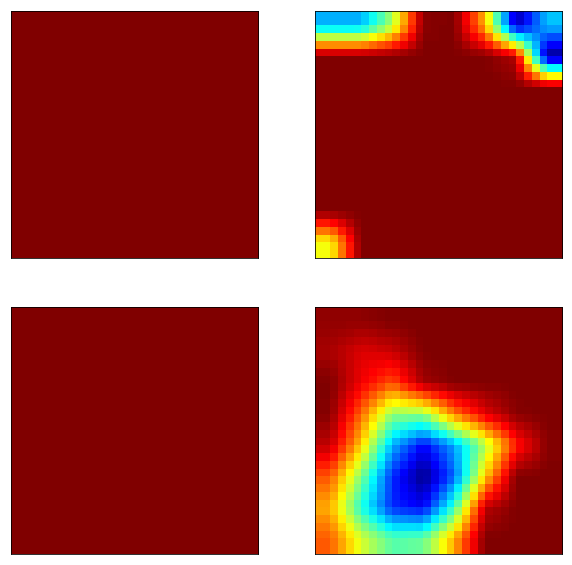

In [20]:
plt.figure(figsize=(10,10))

for i in range(4):
    pt = plt.subplot(2, 2,i+1, xticks=[] , yticks=[])
    pt.imshow(heatma[i])

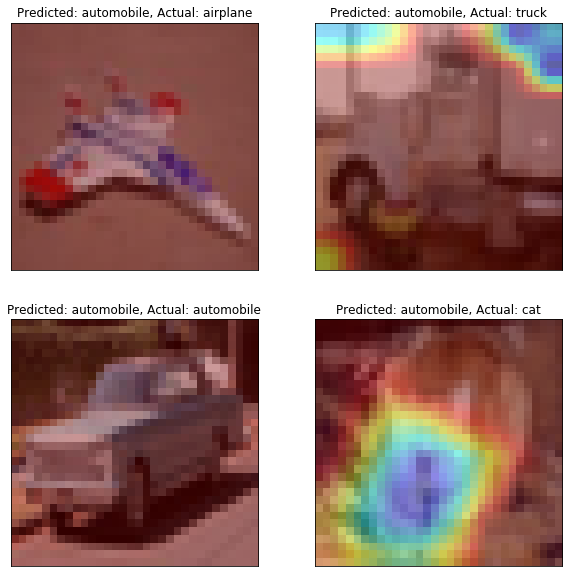

In [21]:
plt.figure(figsize=(10,10))

for i in range(0,4):
    pt = plt.subplot(2, 2,i+1, xticks=[] , yticks=[])
    pt.set_title("Predicted: %s, Actual: %s"%(class_names[class_idx[i]],class_names[int(train_labels[s+i])]))
    pt.imshow(superimp[i])

## CUTOUT


In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

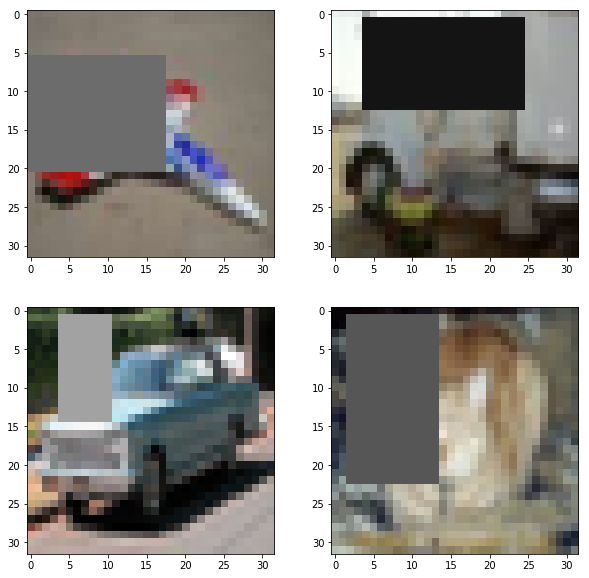

In [23]:
eraser = get_random_eraser(p=1, s_l=0.1, s_h=0.3, v_l=0, v_h=255, pixel_level=False)

s = 30
image = train_features[s:s+4].copy()

img = []
plt.figure(figsize=(10,10))
for i in range(4):
    img.append(eraser(image[i]))
    plt.subplot(2,2,i+1)
    plt.imshow(img[i])

Model have not performed well, so we add

1. Cut_out data augmentation
2. Changing the optimizer from "**Adam**" to "**SGD**"
3. Training with more epochs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app


Epoch 1/100
390/390 [==============================] - 35s 90ms/step - loss: 2.5496 - acc: 0.1721 - val_loss: 2.7567 - val_acc: 0.1125
Epoch 2/100
390/390 [==============================] - 33s 86ms/step - loss: 2.3062 - acc: 0.2376 - val_loss: 2.6148 - val_acc: 0.1534
Epoch 3/100
390/390 [==============================] - 33s 85ms/step - loss: 2.1435 - acc: 0.2993 - val_loss: 4.1505 - val_acc: 0.1018
Epoch 4/100
390/390 [==============================] - 33s 86ms/step - loss: 1.9876 - acc: 0.3518 - val_loss: 2.4378 - val_acc: 0.2266
Epoch 5/100
390/390 [==============================] - 33s 85ms/step - loss: 1.8603 - acc: 0.3905 - val_loss: 2.4441 - val_acc: 0.2203
Epoch 6/100
390/390 [==============================] - 33s 85ms/step - loss: 1.7761 - acc: 0.4158 - val_loss: 2.4943 - val_acc: 0.2059
Epoch 7/100
390/390 [==============================] - 33s 85ms/step - loss: 1.6779 - acc: 0.4509 - val_loss: 2.3320 - val_acc: 0.2576
Epoch 8/100
390/390 [==============================] - 

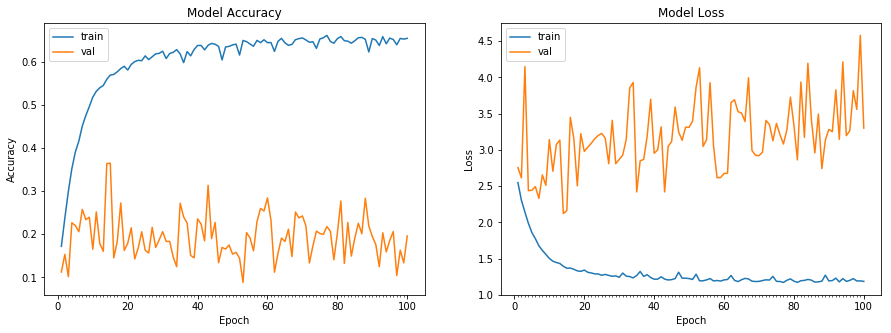

Accuracy on test data is: 19.62


In [24]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function = get_random_eraser(p=1, s_l=0.1, s_h=0.3, v_l=0, v_h=255, pixel_level=False))

#compiling the model
modl.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


import time

start = time.time()  
#Train the model
modl_info = modl.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = X_train.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(modl_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, modl))

In [25]:
modl.evaluate(X_test, Y_test)

10000/10000 [==============================] - 2s 210us/step


[3.3009331146240233, 0.1962]

**Inference from the above result**
   
 Cut-out parameters were too high, so that the model is not training well.
 
   
**Remedy:** Re-training the model with reduced parameters.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app


Epoch 1/100
390/390 [==============================] - 36s 91ms/step - loss: 1.0010 - acc: 0.7178 - val_loss: 1.6753 - val_acc: 0.5034
Epoch 2/100
390/390 [==============================] - 33s 85ms/step - loss: 0.9949 - acc: 0.7203 - val_loss: 1.6574 - val_acc: 0.5024
Epoch 3/100
390/390 [==============================] - 33s 85ms/step - loss: 0.9981 - acc: 0.7190 - val_loss: 1.9302 - val_acc: 0.4296
Epoch 4/100
390/390 [==============================] - 33s 85ms/step - loss: 0.9886 - acc: 0.7225 - val_loss: 1.7006 - val_acc: 0.4827
Epoch 5/100
390/390 [==============================] - 33s 85ms/step - loss: 0.9970 - acc: 0.7198 - val_loss: 1.8098 - val_acc: 0.4871
Epoch 6/100
390/390 [==============================] - 33s 85ms/step - loss: 0.9874 - acc: 0.7235 - val_loss: 2.0147 - val_acc: 0.4127
Epoch 7/100
390/390 [==============================] - 33s 85ms/step - loss: 0.9870 - acc: 0.7234 - val_loss: 1.7352 - val_acc: 0.4918
Epoch 8/100
390/390 [==============================] - 

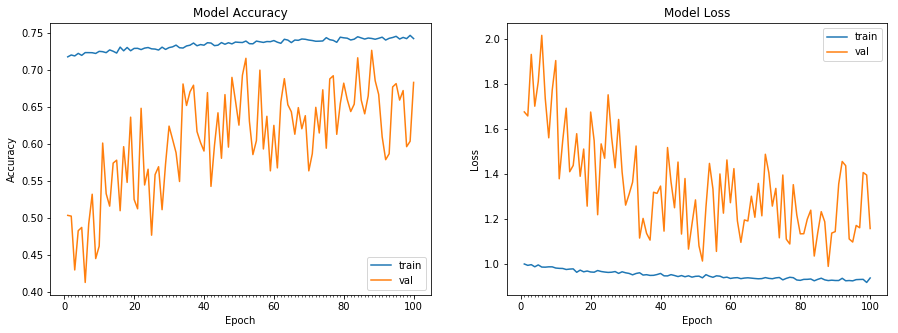

Accuracy on test data is: 68.32


In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function = get_random_eraser(p=1, s_l=0.1, s_h=0.2, v_l=0, v_h=1, pixel_level=False))

#compiling the model
modl.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


import time

start = time.time()  
#Train the model
modl_info = modl.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = X_train.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(modl_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, modl))

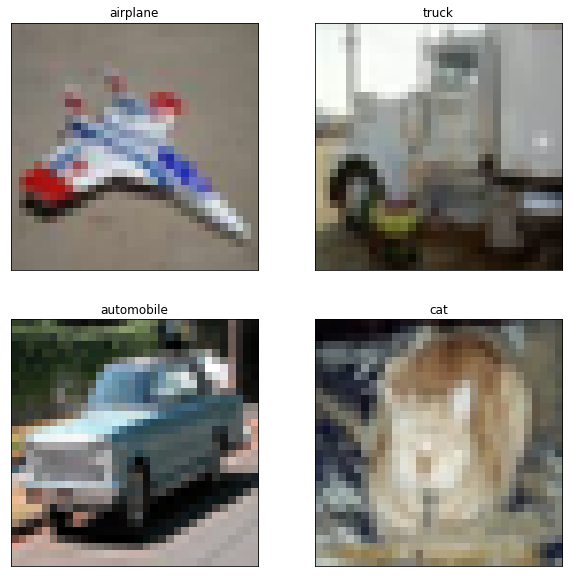

In [32]:
s = 30
ig = train_features[s:s+5]
#x = np.expand_dims(img, axis=0)
x = ig.copy()
img = ig.copy()
x = preprocess_input(x)


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))

for i in range(0,4):
    pt = plt.subplot(2, 2,i+1, xticks=[] , yticks=[])
    pt.set_title(class_names[int(train_labels[s+i])])
    pt.imshow(img[i])

In [33]:
class_output = []
last_conv_layer = []
class_idx=[]

for i in range(4):
    x = img[i]
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = modl.predict(x)
    class_idx.append(np.argmax(preds[0]))
    class_output.append(modl.output[:, class_idx[i]])
    last_conv_layer.append(modl.get_layer("conv2d_11"))
    
#Grad-cam
heatma = []
superimp = []

for i in range(4):
    grads = K.gradients(class_output[i], last_conv_layer[i].output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer[i].output[0]])
    
    x = img[i]
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for j in range(256):
        conv_layer_output_value[:, :, j] *= pooled_grads_value[j]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (32, 32))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatma.append(heatmap)
    dst = cv2.addWeighted(img[i], 0.6,  heatmap, 0.4, 0)
    superimp.append(dst)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


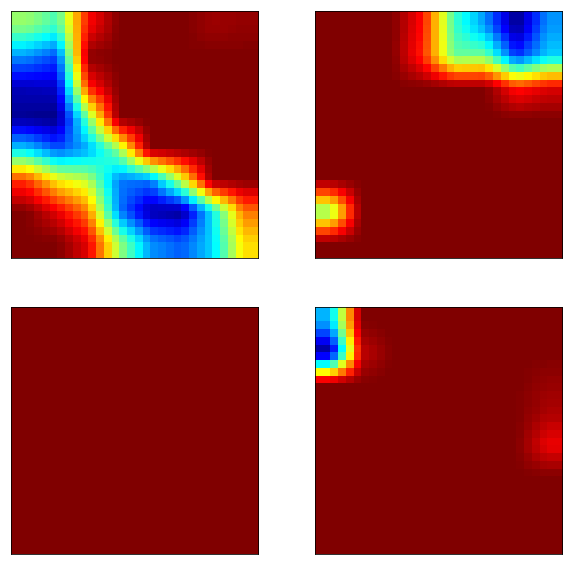

In [34]:
plt.figure(figsize=(10,10))

for i in range(4):
    pt = plt.subplot(2, 2,i+1, xticks=[] , yticks=[])
    pt.imshow(heatma[i])

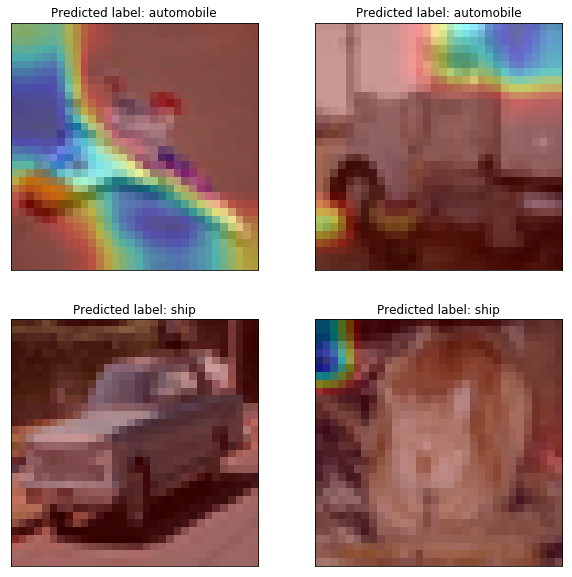

In [35]:
plt.figure(figsize=(10,10))

for i in range(0,4):
    pt = plt.subplot(2, 2,i+1, xticks=[] , yticks=[])
    pt.set_title("Predicted: %s, Actual: %s"%(class_names[class_idx[i]],class_names[int(train_labels[s+i])]))
    pt.imshow(superimp[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app


Epoch 1/100
390/390 [==============================] - 36s 92ms/step - loss: 0.8452 - acc: 0.7722 - val_loss: 1.0676 - val_acc: 0.6998
Epoch 2/100
390/390 [==============================] - 33s 85ms/step - loss: 0.8469 - acc: 0.7718 - val_loss: 1.2649 - val_acc: 0.6247
Epoch 3/100
390/390 [==============================] - 33s 85ms/step - loss: 0.8427 - acc: 0.7720 - val_loss: 0.9828 - val_acc: 0.7237
Epoch 4/100
390/390 [==============================] - 33s 85ms/step - loss: 0.8478 - acc: 0.7722 - val_loss: 1.1951 - val_acc: 0.6382
Epoch 5/100
390/390 [==============================] - 33s 85ms/step - loss: 0.8409 - acc: 0.7758 - val_loss: 1.3613 - val_acc: 0.5936
Epoch 6/100
390/390 [==============================] - 33s 85ms/step - loss: 0.8443 - acc: 0.7743 - val_loss: 1.0954 - val_acc: 0.6869
Epoch 7/100
390/390 [==============================] - 33s 85ms/step - loss: 0.8456 - acc: 0.7711 - val_loss: 1.1051 - val_acc: 0.6771
Epoch 8/100
390/390 [==============================] - 

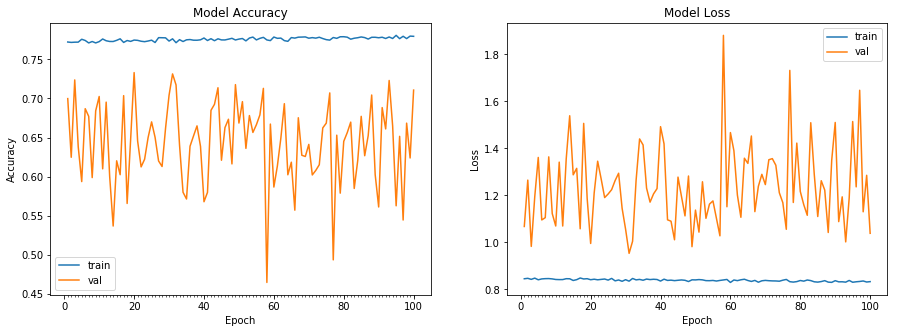

Accuracy on test data is: 71.07


In [36]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function = get_random_eraser(p=1, s_l=0.05, s_h=0.1, v_l=0, v_h=1, pixel_level=False))

#compiling the model
modl.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


import time

start = time.time()  
#Train the model
modl_info = modl.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = X_train.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(modl_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, modl))